In [14]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

From Kirchoff's law, we relate atmospheric emissivity $ \epsilon $ and transmissivity $T$ as: 
$$ \epsilon = 1- T $$
Transmission $T$ is given as a function of wavelength $\nu$ and path length $L$ : 
$$ T = \exp \left( -\sigma_{tot} \left(\nu\right) L \right) $$
where $ \sigma $ is the extinction coefficient due to both atmospheric gasses and aerosols. Here, I follow Roberts et al 1976, which estimates $\sigma_{H_2O}$ between wavelengths of 100 and 1500 $\mu m$ as: 
$$ \sigma_{H_2 O} = -C^\circ ( \nu ) \omega _{H_2O} \left[ P_{H_2O} + \gamma (P- P_{H_2O} ) \right] $$
where $\omega_{H_2O} $ is the volumetric density of water. We can relate this to pressure and temperature by $\omega_{H_2 O} = P_{H_2O} / (RT)$, leaving: 

$$ \sigma_{H_2 O} = -C^\circ ( \nu ) P_{H_2O} / (RT) \left[ P_{H_2O} + \gamma (P- P_{H_2O} ) \right]$$

Note that as $C^\circ ( \nu ) = a+b\exp (-\beta \nu)$, analytical integration is not possible.

We are interested in emissivity as a function of humidity. As there are abundant observations of relative humidity $RH$, we use this parameter. We can relate this to water vapor pressure as: 
$$RH = \frac{P_{H_2O}}{P^\ast_{H_2O}} $$
where $P^\ast_{H_2O}$ is the saturation vapor pressure. It can be linearized as 
$ P^\ast_{H_2O} = A \cdot 10^{\frac{mT}{T+T_n}} $ using the formulation from Vaisala http://www.vaisala.com/Vaisala%20Documents/Application%20notes/Humidity_Conversion_Formulas_B210973EN-F.pdf so that 
$P_{H_2O} = RH \cdot A \cdot 10^{\frac{mT}{T+T_n}} $

Thus we can write the emissivity as a function of the average transmission: 

$$  \epsilon = 1- \frac{1}{1400} \int_{100}^{1500} \exp \left( -\sigma_{tot} \left(\nu\right) L \right) d\nu $$

$$ \epsilon = 1- \frac{1}{1400} \int_{100}^{1500} \exp \left(
C^\circ ( \nu ) \frac{ P_{H_2O}}{ (RT)} \left[ P_{H_2O} + \gamma (P- P_{H_2O} ) \right] 
L \right) d\nu$$

$$
\epsilon = 1- \frac{1}{1400} \int_{100}^{1500} \exp \left(
C^\circ ( \nu ) \frac{ RH \cdot A \cdot 10^{\frac{mT}{T+T_n}}}{ (RT)} \left[ RH \cdot A \cdot 10^{\frac{mT}{T+T_n}} + \gamma (P- RH \cdot A \cdot 10^{\frac{mT}{T+T_n}} ) \right] 
L \right)d\nu
$$

This can be written more simply as: 

$$ \epsilon = 1- \frac{1}{1400} \int_{100}^{1500} \exp C^\circ (\nu) \left(
RH \cdot \left(c_1 RH + c_2 \right)
\right)d\nu
$$
where $c_1 =  \frac {L}{TR} A^2 \cdot 10^{2 \frac{mT}{T+T_n}} \left(1-\gamma \right) $ and 
$c_2 = \frac{L}{TR} A \cdot 10^{ \frac{mT}{T+T_n}} \gamma P $. 
Thus we can express the partial dependence on relative humidity as: 
$$ \frac{\partial \epsilon}{\partial RH} =  1- \frac{1}{1400}\int_{100}^{1500} C^\circ (\nu) \frac{\partial}{\partial RH} \exp ^ {C^\circ (\nu) RH \cdot \left(c_1 RH + c_2 \right)}
 $$
 
 $$ \frac{\partial \epsilon}{\partial RH} = - \frac{1}{1400} \int_{100}^{1500} C^\circ (\nu)
 \left( 2 \cdot RH \frac{\partial c_1}{\partial RH} + \frac{\partial c_2}{\partial RH} \right) 
 \cdot \exp ^ { C^\circ (\nu) RH \cdot \left(c_1 RH + c_2 \right)} 
 d\nu $$
 
  $$ \frac{\partial \epsilon}{\partial RH} = - \frac{1}{1400} 
   \left( 2 \cdot RH \frac{\partial c_1}{\partial RH} + \frac{\partial c_2}{\partial RH} \right)  
   \int_{100}^{1500} 
 C^\circ (\nu) \cdot \exp ^ {C^\circ (\nu) RH \cdot \left(c_1 RH + c_2 \right)} 
 d\nu $$
 
 where 
 $\frac{\partial c_1}{\partial RH} = $
 and   $\frac{\partial c_2}{\partial RH} = $

If we assume temperature is fixed, we can ask what the change is when we pass from a warm, dry  day to a warm, moist day. This we will do numerically. 

In [4]:
np.linspace(400, 1200,50).shape

(50,)

In [89]:
nu = np.linspace(400, 1200,50)
rh = .85
#rh = np.linspace(.15, .95)
P = 1 # pressure in atmospheres
T = 296
L = .5 # should be in km, if using Roberts 76 constants

Co = 1.25e-22 + 2.34e-19* np.exp(-8.3e-3 * nu)
#Co = 10**(-20)*np.ones(50)

gamma = 0.005 # could also be 0.002
R = 8.314
# RH constants from Vaisala http://www.vaisala.com/Vaisala%20Documents/Application%20notes/Humidity_Conversion_Formulas_B210973EN-F.pdf
A = 6.116441
T_n = 240.7263
m = 7.591386
c1 = L/(T*R) *A**2 *10**(2*m*T/(T+T_n))*(1 - gamma)
c2 =L/(T*R) *A *10**(m*T/(T+T_n))*(gamma)* P
sigma = Co * rh*(c1*rh + c2)

epsilon = 1- 1/(1200-400.) * sum(np.exp(-1*sigma * L ))
epsilon

0.9375

In [102]:
np.mean(-1*sigma*15)

-2.8230155105063333e-14

In [103]:
np.sum(-1*sigma*15)/(800.)

-1.7643846940664583e-15

In [170]:
def epsilon(rh):
    # compute upsilon as a function of relative humidity
    eps = np.ones(rh.shape)*np.nan

    nu = np.linspace(400, 1200,500) # wavelengths
    P = 1 # pressure in atmospheres
    T = 300
    L = .5 # should be in km, if using Roberts 76 constants
    Co = 1.25e-22 + 2.34e-19* np.exp(-8.3e-3 * nu)
    gamma = 0.005 # could also be 0.002
    R = 8.314
    # RH constants from Vaisala http://www.vaisala.com/Vaisala%20Documents/Application%20notes/Humidity_Conversion_Formulas_B210973EN-F.pdf
    A = 6.116441
    T_n = 240.7263
    m = 7.591386
    c1 = L/(T*R) *A**2 *10**(2*m*T/(T+T_n))*(1 - gamma)
    c2 =L/(T*R) *A *10**(m*T/(T+T_n))*(gamma)* P
    sigma = Co * rh*(c1*rh + c2)
    i = 0 
    for r in rh: 
        eps[i] = 1- 1/(1200-400.) * np.sum(np.exp(-1*sigma * L ))
        i = i+1
    return eps

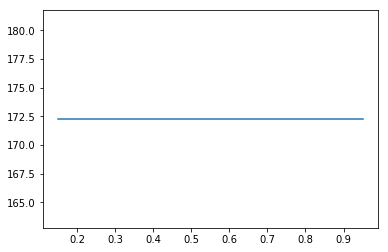

In [171]:
rh = np.linspace(.15, .95, 500)
sigma = 5.671e-8 #W.m-2.K-4
plt.plot(rh, epsilon(rh)*sigma*T**4)

In [195]:
def eps_from_p(p_h2o):
    # compute upsilon as a function of partial pressure of water vapor in mbar
    eps = np.ones(p_h2o.shape)*np.nan

    nu = np.linspace(400, 1200,500) # wavelengths
    P = 1000 # pressure in mbar
    T = 300
    L = 5 # should be in km, if using Roberts 76 constants
    Co = 1.25e-22 + 2.34e-19* np.exp(-8.3e-3 * nu)
    gamma = 0.005 # could also be 0.002
    R = 8.314
    # RH constants from Vaisala http://www.vaisala.com/Vaisala%20Documents/Application%20notes/Humidity_Conversion_Formulas_B210973EN-F.pdf
    
    
    i = 0 
    for p in p_h2o:
        sigma = Co/ (R*T) * (p *(p *(1-gamma) + gamma*P))
        eps[i] = 1- 1/(1200-400.) * np.sum(np.exp(-1*sigma * L ))
        i = i+1
    return eps

In [194]:
Co/(R*10**(-6)*T) * (q *(q *(1-gamma) + gamma*P))

array([  8.64774922e-19,   1.24217493e-14,   4.86342361e-14,
         1.07702739e-13,   1.88716461e-13,   2.90788852e-13,
         4.13057067e-13,   5.54681443e-13,   7.14844989e-13,
         8.92752872e-13,   1.08763193e-12,   1.29873019e-12,
         1.52531637e-12,   1.76667946e-12,   2.02212822e-12,
         2.29099075e-12,   2.57261405e-12,   2.86636360e-12,
         3.17162295e-12,   3.48779325e-12,   3.81429293e-12,
         4.15055724e-12,   4.49603789e-12,   4.85020265e-12,
         5.21253503e-12,   5.58253384e-12,   5.95971290e-12,
         6.34360064e-12,   6.73373981e-12,   7.12968709e-12,
         7.53101280e-12,   7.93730055e-12,   8.34814697e-12,
         8.76316135e-12,   9.18196535e-12,   9.60419275e-12,
         1.00294891e-11,   1.04575114e-11,   1.08879281e-11,
         1.13204183e-11,   1.17546720e-11,   1.21903897e-11,
         1.26272818e-11,   1.30650688e-11,   1.35034810e-11,
         1.39422580e-11,   1.43811486e-11,   1.48199106e-11,
         1.52583106e-11,

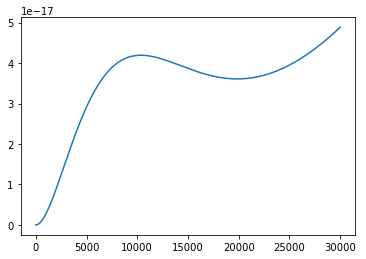

In [196]:
q = np.linspace(.5, 30000, 500)
p = q[-1]
plt.plot(q, Co/(R*T) * (q *(q *(1-gamma) + gamma*P)))

In [199]:
eps_from_p(q)

array([ 0.375,  0.375,  0.375,  0.375,  0.375,  0.375,  0.375,  0.375,
        0.375,  0.375,  0.375,  0.375,  0.375,  0.375,  0.375,  0.375,
        0.375,  0.375,  0.375,  0.375,  0.375,  0.375,  0.375,  0.375,
        0.375,  0.375,  0.375,  0.375,  0.375,  0.375,  0.375,  0.375,
        0.375,  0.375,  0.375,  0.375,  0.375,  0.375,  0.375,  0.375,
        0.375,  0.375,  0.375,  0.375,  0.375,  0.375,  0.375,  0.375,
        0.375,  0.375,  0.375,  0.375,  0.375,  0.375,  0.375,  0.375,
        0.375,  0.375,  0.375,  0.375,  0.375,  0.375,  0.375,  0.375,
        0.375,  0.375,  0.375,  0.375,  0.375,  0.375,  0.375,  0.375,
        0.375,  0.375,  0.375,  0.375,  0.375,  0.375,  0.375,  0.375,
        0.375,  0.375,  0.375,  0.375,  0.375,  0.375,  0.375,  0.375,
        0.375,  0.375,  0.375,  0.375,  0.375,  0.375,  0.375,  0.375,
        0.375,  0.375,  0.375,  0.375,  0.375,  0.375,  0.375,  0.375,
        0.375,  0.375,  0.375,  0.375,  0.375,  0.375,  0.375,  0.375,
      

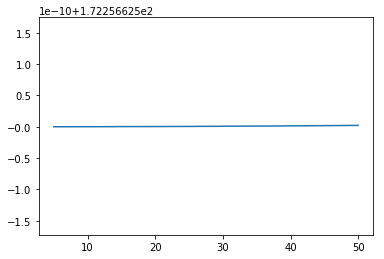

In [198]:
q = np.linspace(5, 50, 500)
sigma = 5.671e-8 #W.m-2.K-4
plt.plot(q, eps_from_p(q)*sigma*T**4)

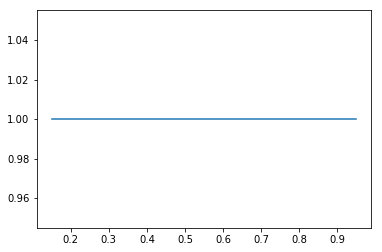

In [15]:
plt.plot(rh, np.exp(sigma*L))